In [1]:
import json
import pandas as pd

from NewsBiasClustering import NewsBiasClusteringFromMetrics

In [2]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
from collections import Counter


def display(metrics, labels, hasNeg = False):
    # Reduce Data Dimensions
    data = pd.DataFrame(metrics,columns=['sentiment','quoteBased','sensationalized','mudslinging','spin','informal'])
    scalar = StandardScaler()
    scaled_data = pd.DataFrame(scalar.fit_transform(data),columns=['sentiment','quoteBased','sensationalized','mudslinging','spin','informal']) #scaling the data
    #sns.heatmap(scaled_data.corr())
    pca = PCA(n_components = 2)
    pca.fit(scaled_data)
    data_pca = pca.transform(scaled_data)
    data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
    #sns.heatmap(data_pca.corr())

    # Output Clustered Graph
    for i in range(len(set(labels))):
        if hasNeg:
            i = i - 1
        pc1 = []
        pc2 = []
        for j in range(len(labels)):
            if labels[j] == i:
                pc1.append(data_pca.iloc[j]['PC1'])
                pc2.append(data_pca.iloc[j]['PC2'])
        plt.scatter(pc1,pc2,s=5) 
    plt.show()

In [3]:
print('Loading File')
file = open('rust-articles-backup-metrics.json', encoding='utf8')
articles = pd.DataFrame.from_dict(json.load(file))
print('File Loaded')

Loading File
File Loaded


In [4]:
metrics = []
for i in range(len(articles)): # for i in range(10000)):
    sentiment = articles.iloc[i]['sentiment']
    quoteBased = articles.iloc[i]['quoteBased']
    sensationalized = articles.iloc[i]['sensationalized']
    mudslinging = articles.iloc[i]['mudslinging']
    spin = articles.iloc[i]['spin']
    informal = articles.iloc[i]['informal']
    metrics.append([sentiment, quoteBased, sensationalized, mudslinging, spin, informal])

Counter({0: 70322, 4: 43679, 2: 21668, 1: 14978, 3: 10578})


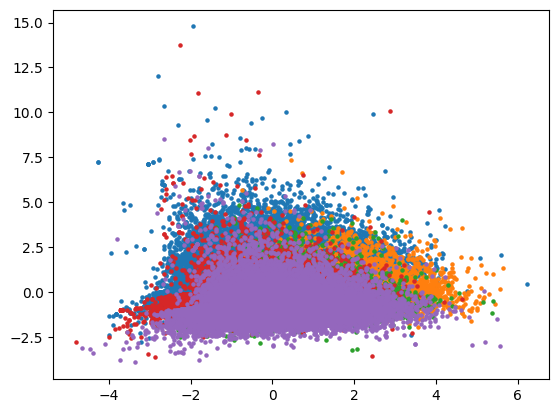

In [5]:
NewsBiasClusteringFromMetrics(metrics, threshold=0.32)

Counter({1: 2170, 2: 2023, 4: 1142, 6: 1109, 7: 1103, 8: 782, 0: 645, 3: 623, 5: 403})


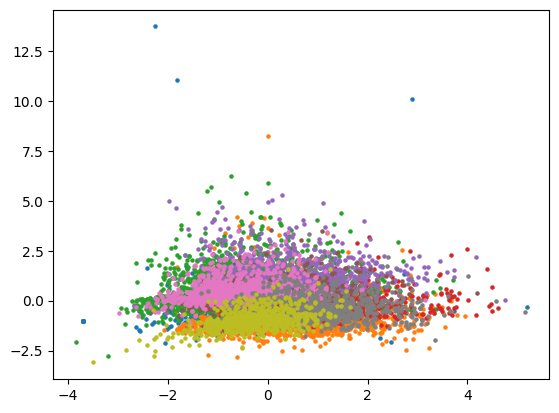

In [6]:
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=5.5, linkage='ward').fit(metrics[:10000])
labels = clustering.labels_
print(Counter(labels))
display(metrics, labels)